In [1]:
%xmode Verbose
%matplotlib inline

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from shapely.geometry import LineString
from tqdm.notebook import tqdm
tqdm.pandas()

import TRACLUS_JSON_Prep as tjp
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

import os
pickle_path = 'Variables/'

if not os.path.exists(pickle_path):
    os.makedirs(pickle_path)

Exception reporting mode: Verbose


/home/max/miniconda3/envs/thesis/lib/python3.7/site-packages/tqdm/std.py:699: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [2]:
path_pollen_file = 'Data/resultsfile_pollen.csv'
path_no_pollen_file = 'Data/resultsfile_no_pollen.csv'

data_pollen = pd.read_csv(path_pollen_file, index_col='path_id', parse_dates=['first_timestamp', 'last_timestamp'])
data_no_pollen = pd.read_csv(path_no_pollen_file, index_col='path_id', parse_dates=['first_timestamp', 'last_timestamp'])

In [3]:
data_no_pollen.head()

,positions,first_timestamp,last_timestamp,first_snippet_link,last_snippet_link
path_id,,,,,
252107318,"{""(12813,10472)"",""(13249,10937)"",""(13752,11580...",2019-05-12 08:28:53,2019-05-12 08:28:53,gs://eurofins-study-05-2018/24_6/2019-05-12T08...,gs://eurofins-study-05-2018/24_6/2019-05-12T08...
252212481,"{""(11408,101240)"",""(11339,100731)"",""(11133,990...",2019-05-12 08:47:45,2019-05-12 08:47:45,gs://eurofins-study-05-2018/24_12/2019-05-12T0...,gs://eurofins-study-05-2018/24_12/2019-05-12T0...
252215191,"{""(13850,104441)"",""(13850,104441)"",""(13850,104...",2019-05-12 08:47:45,2019-05-12 08:47:45,gs://eurofins-study-05-2018/24_12/2019-05-12T0...,gs://eurofins-study-05-2018/24_12/2019-05-12T0...
252214249,"{""(13435,105192)"",""(13586,104709)"",""(13993,103...",2019-05-12 08:47:45,2019-05-12 08:47:45,gs://eurofins-study-05-2018/24_12/2019-05-12T0...,gs://eurofins-study-05-2018/24_12/2019-05-12T0...
252215566,"{""(126544,104227)"",""(126424,103669)"",""(126516,...",2019-05-12 08:47:45,2019-05-12 08:47:45,gs://eurofins-study-05-2018/24_12/2019-05-12T0...,gs://eurofins-study-05-2018/24_12/2019-05-12T0...


In [4]:
print("Length Pollen: {} | Length NO Pollen: {}".format(data_pollen.shape[0], data_no_pollen.shape[0]))

data_pollen.dropna(inplace=True)
data_no_pollen.dropna(inplace=True)

print("++dropna++ Length Pollen: {} | Length NO Pollen: {}".format(data_pollen.shape[0], data_no_pollen.shape[0]))

Length Pollen: 100854 | Length NO Pollen: 1000000
++dropna++ Length Pollen: 100853 | Length NO Pollen: 1000000


In [5]:
print("Length Pollen: {} | Length NO Pollen: {}".format(data_pollen.shape[0], data_no_pollen.shape[0]))

data_pollen.drop_duplicates(subset=['positions'], inplace=True)
data_no_pollen.drop_duplicates(subset=['positions'], inplace=True)

print("++drop_duplicate++ Length Pollen: {} | Length NO Pollen: {}".format(data_pollen.shape[0], data_no_pollen.shape[0]))

Length Pollen: 100853 | Length NO Pollen: 1000000
++drop_duplicate++ Length Pollen: 100852 | Length NO Pollen: 676766


In [6]:
print("Length Pollen: {} | Length NO Pollen: {}".format(data_pollen.shape[0], data_no_pollen.shape[0]))

# Remove data_pollen from data_no_pollen
data_no_pollen.drop(labels=data_pollen.index, inplace=True)

print("++drop++ Length Pollen: {} | Length NO Pollen: {}".format(data_pollen.shape[0], data_no_pollen.shape[0]))

Length Pollen: 100852 | Length NO Pollen: 676766
++drop++ Length Pollen: 100852 | Length NO Pollen: 575914


In [7]:
data_pollen.to_pickle(pickle_path + 'data_pollen.pkl')
data_no_pollen.to_pickle(pickle_path + 'data_no_pollen.pkl')


In [3]:
def position_str_to_list(row: pd.Series):
    row['positions'] = row['positions'].replace('{', '').replace('}', '').replace('\"', '')
    row['positions'] = LineString(eval(row['positions']))
    return row

In [4]:
tmp_data_pollen = data_pollen.progress_apply(position_str_to_list, axis='columns')

In [5]:
geo_data_pollen = gpd.GeoDataFrame({'timestamp': tmp_data_pollen['first_timestamp']},
                                   geometry=tmp_data_pollen['positions'],
                                   index=data_pollen.index)
geo_data_pollen.head()

,timestamp,geometry
path_id,,
252107318,2019-05-12 08:28:53,"LINESTRING (12813.000 10472.000, 13249.000 109..."
252212481,2019-05-12 08:47:45,"LINESTRING (11408.000 101240.000, 11339.000 10..."
252215191,2019-05-12 08:47:45,"LINESTRING (13850.000 104441.000, 13850.000 10..."
252214249,2019-05-12 08:47:45,"LINESTRING (13435.000 105192.000, 13586.000 10..."
252215566,2019-05-12 08:47:45,"LINESTRING (126544.000 104227.000, 126424.000 ..."


In [6]:
tmp_data_no_pollen = data_no_pollen.progress_apply(position_str_to_list, axis='columns')

In [7]:
geo_data_no_pollen = gpd.GeoDataFrame({'timestamp': tmp_data_no_pollen['first_timestamp']},
                                      geometry=tmp_data_no_pollen['positions'],
                                      index=data_no_pollen.index)

geo_data_no_pollen.head()

,timestamp,geometry
path_id,,
256566320,2019-05-15 11:06:39,"LINESTRING (82995.000 105192.000, 85242.000 10..."
256611902,2019-05-15 11:06:39,"LINESTRING (49459.000 104951.000, 49317.000 10..."
256611953,2019-05-15 11:06:39,"LINESTRING (34664.000 103883.000, 35115.000 10..."
256612000,2019-05-15 11:06:39,"LINESTRING (134426.000 103905.000, 134426.000 ..."
256612023,2019-05-15 11:06:39,"LINESTRING (81576.000 12573.000, 81280.000 145..."


In [8]:
geo_data_pollen.to_pickle(pickle_path + 'geo_data_pollen.pkl')
geo_data_no_pollen.to_pickle(pickle_path + 'geo_data_no_pollen.pkl')

<AxesSubplot:ylabel='Probability'>

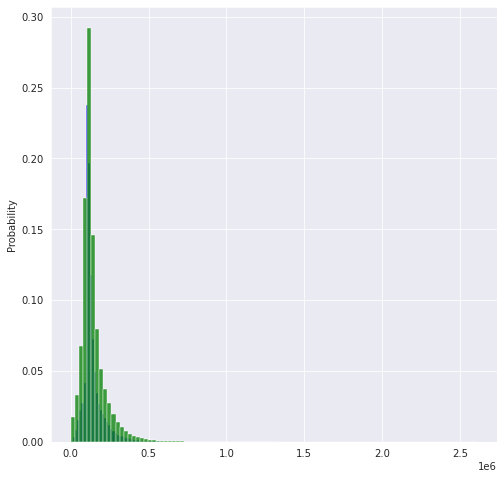

In [4]:
plt.figure(figsize=(8, 8))

# So that the background is white
#sns.set_style('white')
sns.set_style('darkgrid')

sns.histplot(data=geo_data_pollen.length, stat='probability', color='blue', bins=100)
sns.histplot(data=geo_data_no_pollen.length, stat='probability', color='green', bins=100)

#sns.histplot(data=geo_data_pollen.length, stat='probability', color='blue', binwidth=3)
#sns.histplot(data=geo_data_no_pollen.length, stat='probability', color='green', binwidth=3)

In [15]:
print('geo_data_pollen.shape: ', geo_data_pollen.shape,
      ' geo_data_no_pollen.shape: ', geo_data_no_pollen.shape)

geo_data_pollen.shape:  (100852, 2)  geo_data_no_pollen.shape:  (575914, 2)


In [16]:
geo_data_pollen.length.describe()

count    1.008520e+05
mean     1.367963e+05
std      6.753415e+04
min      1.400527e+03
25%      1.026137e+05
50%      1.166057e+05
75%      1.488942e+05
max      1.331922e+06
dtype: float64

In [17]:
geo_data_no_pollen.length.describe()

count    5.759140e+05
mean     1.429178e+05
std      8.426176e+04
min      0.000000e+00
25%      1.014759e+05
50%      1.211838e+05
75%      1.623049e+05
max      2.608381e+06
dtype: float64

In [18]:
geo_data_pollen_length_by_day = geo_data_pollen.groupby(geo_data_pollen['timestamp'].dt.date)
geo_data_pollen_length_by_day.head()

,timestamp,geometry
path_id,,
252107318,2019-05-12 08:28:53,"LINESTRING (12813.000 10472.000, 13249.000 109..."
252212481,2019-05-12 08:47:45,"LINESTRING (11408.000 101240.000, 11339.000 10..."
252215191,2019-05-12 08:47:45,"LINESTRING (13850.000 104441.000, 13850.000 10..."
252214249,2019-05-12 08:47:45,"LINESTRING (13435.000 105192.000, 13586.000 10..."
252215566,2019-05-12 08:47:45,"LINESTRING (126544.000 104227.000, 126424.000 ..."
254549097,2019-05-13 06:20:23,"LINESTRING (10535.000 12277.000, 10857.000 127..."
254549094,2019-05-13 06:20:23,"LINESTRING (12063.000 12063.000, 12325.000 125..."
254549793,2019-05-13 06:20:23,"LINESTRING (11661.000 102082.000, 11580.000 10..."
253333948,2019-05-13 06:41:42,"LINESTRING (118150.000 101885.000, 119186.000 ..."


In [19]:
geo_data_pollen_length_by_day.count()

,timestamp,geometry
timestamp,,
2019-05-12,25041,25041
2019-05-13,39587,39587
2019-05-14,27520,27520
2019-05-15,8704,8704


In [20]:
geo_data_no_pollen_length_by_day = geo_data_no_pollen.groupby(geo_data_no_pollen['timestamp'].dt.date)
geo_data_no_pollen_length_by_day.head()

,timestamp,geometry
path_id,,
256566320,2019-05-15 11:06:39,"LINESTRING (82995.000 105192.000, 85242.000 10..."
256611902,2019-05-15 11:06:39,"LINESTRING (49459.000 104951.000, 49317.000 10..."
256611953,2019-05-15 11:06:39,"LINESTRING (34664.000 103883.000, 35115.000 10..."
256612000,2019-05-15 11:06:39,"LINESTRING (134426.000 103905.000, 134426.000 ..."
256612023,2019-05-15 11:06:39,"LINESTRING (81576.000 12573.000, 81280.000 145..."
...,...,...
487840329,2019-07-18 00:04:45,"LINESTRING (23912.000 103783.000, 23912.000 10..."
486344170,2019-07-18 00:16:30,"LINESTRING (3484.000 75757.000, 3484.000 75757..."
486344178,2019-07-18 00:16:30,"LINESTRING (3484.000 75757.000, 3492.000 75987..."


In [21]:
geo_data_no_pollen_length_by_day.count()

,timestamp,geometry
timestamp,,
2019-05-15,14319,14319
2019-05-16,28063,28063
2019-05-17,23151,23151
2019-05-18,20050,20050
2019-05-19,24014,24014
2019-05-20,4796,4796
2019-05-21,8,8
2019-05-22,19088,19088
2019-05-23,18491,18491


In [22]:
geo_data_pollen.length.groupby(geo_data_pollen['timestamp'].dt.date).describe()

,count,mean,std,min,25%,50%,75%,max
timestamp,,,,,,,,
2019-05-12,25041.0,134926.607746,65263.254171,1400.526595,102898.915318,116187.533081,146576.339419,1.331922e+06
2019-05-13,39587.0,139372.850302,71155.522112,2891.515001,102391.646639,117904.649301,154005.942735,9.379701e+05
2019-05-14,27520.0,136634.499687,67251.368485,2735.068935,102681.464619,116304.192448,147153.160408,1.240653e+06
2019-05-15,8704.0,130968.430249,56496.220263,4012.128465,102416.489592,113932.285003,140267.216645,8.818719e+05


In [23]:
geo_data_no_pollen.length.groupby(geo_data_no_pollen['timestamp'].dt.date).mean()

timestamp
2019-05-15    138316.919233
2019-05-16    144582.048256
2019-05-17    147708.708468
2019-05-18    145720.423614
2019-05-19    139878.366507
2019-05-20    138046.260223
2019-05-21    127361.744909
2019-05-22    138162.167592
2019-05-23    144140.114072
2019-05-24    142933.788216
2019-05-25    143341.285714
2019-05-26    139530.563029
2019-05-27    141151.026073
2019-05-28    135560.256570
2019-05-29    140806.598169
2019-05-30    145014.090847
2019-05-31    139323.098415
2019-06-01    153542.423637
2019-06-02    152719.027892
2019-06-03    154400.281791
2019-06-04    146086.357285
2019-06-05    143837.715756
2019-06-06    130239.843226
2019-06-07    146736.336014
2019-06-08    132065.556037
2019-06-09    144847.451485
2019-06-10    141295.458197
2019-06-11    144822.734367
2019-06-12    134063.203276
2019-06-13    135045.228818
2019-06-14     79206.129745
2019-06-15    115568.003329
2019-06-16     72947.883318
2019-06-17     75248.417559
2019-06-27     50784.663088
2019-06-28

In [24]:
len(geo_data_no_pollen_length_by_day)

56

In [25]:
length = geo_data_pollen.groupby(geo_data_pollen['timestamp'].dt.date)#.agg(lambda x: x['timestamp'].dt.date)
length.head()

,timestamp,geometry
path_id,,
252107318,2019-05-12 08:28:53,"LINESTRING (12813.000 10472.000, 13249.000 109..."
252212481,2019-05-12 08:47:45,"LINESTRING (11408.000 101240.000, 11339.000 10..."
252215191,2019-05-12 08:47:45,"LINESTRING (13850.000 104441.000, 13850.000 10..."
252214249,2019-05-12 08:47:45,"LINESTRING (13435.000 105192.000, 13586.000 10..."
252215566,2019-05-12 08:47:45,"LINESTRING (126544.000 104227.000, 126424.000 ..."
254549097,2019-05-13 06:20:23,"LINESTRING (10535.000 12277.000, 10857.000 127..."
254549094,2019-05-13 06:20:23,"LINESTRING (12063.000 12063.000, 12325.000 125..."
254549793,2019-05-13 06:20:23,"LINESTRING (11661.000 102082.000, 11580.000 10..."
253333948,2019-05-13 06:41:42,"LINESTRING (118150.000 101885.000, 119186.000 ..."


In [2]:
data_pollen = pd.read_pickle(pickle_path + 'data_pollen.pkl')
data_no_pollen = pd.read_pickle(pickle_path + 'data_no_pollen.pkl')

In [3]:
geo_data_pollen = pd.read_pickle(pickle_path + 'geo_data_pollen.pkl')

In [4]:
geo_data_no_pollen = pd.read_pickle(pickle_path + 'geo_data_no_pollen.pkl')

In [4]:
geo_data_pollen['geometry'] = geo_data_pollen['geometry'].apply(lambda x: list(x.coords))


/home/max/miniconda3/envs/thesis/lib/python3.7/site-packages/geopandas/geodataframe.py:852: UserWarning: Geometry column does not contain geometry.
  warnings.warn("Geometry column does not contain geometry.")


In [14]:
geo_coords = geo_data_pollen['geometry'].apply(lambda x: list(x.coords))

In [19]:
type(geo_coords.iloc[1])

list

In [5]:
geo_data_pollen.head()

,timestamp,geometry
path_id,,
252107318,2019-05-12 08:28:53,"[(12813.0, 10472.0), (13249.0, 10937.0), (1375..."
252212481,2019-05-12 08:47:45,"[(11408.0, 101240.0), (11339.0, 100731.0), (11..."
252215191,2019-05-12 08:47:45,"[(13850.0, 104441.0), (13850.0, 104441.0), (13..."
252214249,2019-05-12 08:47:45,"[(13435.0, 105192.0), (13586.0, 104709.0), (13..."
252215566,2019-05-12 08:47:45,"[(126544.0, 104227.0), (126424.0, 103669.0), (..."


In [3]:
data_types_dict = {'geometry': object}

geo_data_pollen = geo_data_pollen.astype(data_types_dict)

geo_data_pollen.head()

,timestamp,geometry
path_id,,
252107318,2019-05-12 08:28:53,"LINESTRING (12813 10472, 13249 10937, 13752 11..."
252212481,2019-05-12 08:47:45,"LINESTRING (11408 101240, 11339 100731, 11133 ..."
252215191,2019-05-12 08:47:45,"LINESTRING (13850 104441, 13850 104441, 13850 ..."
252214249,2019-05-12 08:47:45,"LINESTRING (13435 105192, 13586 104709, 13993 ..."
252215566,2019-05-12 08:47:45,"LINESTRING (126544 104227, 126424 103669, 1265..."


In [4]:
geo_data_pollen.dtypes

timestamp    datetime64[ns]
geometry           geometry
dtype: object

In [3]:
import dask_geopandas as dg

sample_linestrings = dg.from_geopandas(geo_data_pollen['geometry'].iloc[0:50], npartitions=5)

sample_linestrings.head()

path_id
252107318    LINESTRING (12813.000 10472.000, 13249.000 109...
252133674    LINESTRING (18662.000 103630.000, 17879.000 10...
252133710    LINESTRING (12374.000 103503.000, 12787.000 10...
252134520    LINESTRING (91560.000 102779.000, 91372.000 10...
252134720    LINESTRING (136141.000 105360.000, 136353.000 ...
dtype: geometry

In [4]:
type(sample_linestrings)


dask_geopandas.core.GeoSeries

In [5]:
sample_linestrings.dtype

832

In [2]:
def create_header(epsilon=0.00016, min_neighbors=2,
                min_num_trajectories_in_cluster=3, min_vertical_lines=2,
                min_prev_dist=0.0002):
    header = {
        "epsilon": epsilon,
        "min_neighbors": min_neighbors,
        "min_num_trajectories_in_cluster": min_num_trajectories_in_cluster,
        "min_vertical_lines": min_vertical_lines,
        "min_prev_dist": min_prev_dist
    }
    return header

def create_trajectory_list(trajectory):
    trajectory = pd.Series(trajectory.coords)

    trajectory = trajectory.map(lambda point: {'x': point[0], 'y': point[1]})

    return trajectory.tolist()#to_json(orient='records')

def create_json(header, trajectories):
    import json
    header.update({'trajectories': trajectories})

    return json.dumps(header, indent=4)

def write_to_file(traclus_json, filename="traclus_trajectories.json"):
    with open("Data/" + filename, 'w+') as f:
        f.write(traclus_json)

In [5]:
sample_pollen_10k = geo_data_no_pollen['geometry'].sample(n=10000, random_state=2)
sample_no_pollen_10k = geo_data_no_pollen['geometry'].sample(n=10000, random_state=2)

sample_20k = sample_pollen_10k.append(sample_no_pollen_10k).sample(frac=1)

In [8]:
sample_20k.to_pickle(pickle_path + 'sample_20k.pkl')

In [9]:
import dask_geopandas as dg

sample_20k_dg = dg.from_geopandas(sample_20k, chunksize=16000000)

sample_20k_trajectories = sample_20k_dg.map_partitions(
    lambda df: df.apply(
        lambda row: create_trajectory_list(row))).compute()

header = create_header()

trajectories_json = create_json(header, sample_20k_trajectories.tolist())

write_to_file(trajectories_json, 'traclus_trajectories_20k.txt')

In [5]:
sample_pollen_25k = geo_data_no_pollen['geometry'].sample(n=25000, random_state=2)
sample_no_pollen_25k = geo_data_no_pollen['geometry'].sample(n=25000, random_state=2)

In [10]:
sample_50k = sample_no_pollen_25k.append(sample_pollen_25k)
sample_50k.head()

In [13]:
sample_50k = sample_50k.sample(frac=1)
sample_50k.head()

path_id
307530249    LINESTRING (13814.000 60281.000, 13814.000 602...
263792010    LINESTRING (135381.000 103423.000, 135381.000 ...
256121202    LINESTRING (134144.000 91199.000, 134144.000 9...
347583210    LINESTRING (22860.000 103488.000, 21653.000 10...
284032383    LINESTRING (71098.000 9704.000, 71533.000 9891...
dtype: geometry

In [15]:
sample_pollen_25k.to_pickle(pickle_path + 'sample_pollen_25k.pkl')
sample_no_pollen_25k.to_pickle(pickle_path + 'sample_no_pollen_25k.pkl')
sample_50k.to_pickle(pickle_path + 'sample_50k.pkl')

In [16]:
import dask_geopandas as dg

sample_50k_dg = dg.from_geopandas(sample_50k, chunksize=16000000)

sample_50k_dg.head()

path_id
255264723    LINESTRING (106337.000 13832.000, 106336.000 1...
255264723    LINESTRING (106337.000 13832.000, 106336.000 1...
255264955    LINESTRING (132115.000 105701.000, 132240.000 ...
255264955    LINESTRING (132115.000 105701.000, 132240.000 ...
255340852    LINESTRING (55732.000 105916.000, 55974.000 10...
dtype: geometry

In [17]:
sample_50k_trajectories = sample_50k_dg.map_partitions(
    lambda df: df.apply(
        lambda row: create_trajectory_list(row))).compute()

In [18]:
header = create_header()

trajectories_json = create_json(header, sample_50k_trajectories.tolist())

In [19]:
write_to_file(trajectories_json, 'traclus_trajectories_50k.txt')


In [3]:
sample_train = pd.read_pickle(pickle_path + 'sample_train.pkl')
sample_train = sample_train.astype({'geometry': 'geometry'})

In [4]:
sample_train.head()

,timestamp,geometry
0,2019-07-18 07:48:46,"LINESTRING (98246.000 12397.000, 99342.000 151..."
1,2019-05-18 08:11:37,"LINESTRING (65114.000 10160.000, 63325.000 121..."
2,2019-05-28 14:48:32,"LINESTRING (133662.000 103262.000, 133753.000 ..."
3,2019-06-09 10:33:48,"LINESTRING (12447.000 10589.000, 12490.000 111..."
4,2019-06-05 09:56:16,"LINESTRING (11869.000 104166.000, 11482.000 10..."


In [5]:
sample_train.shape

(141192, 2)

In [6]:
import dask_geopandas as dg

sample_linestrings = dg.from_geopandas(sample_train['geometry'], chunksize=16000000)

sample_linestrings.head()


0    LINESTRING (98246.000 12397.000, 99342.000 151...
1    LINESTRING (65114.000 10160.000, 63325.000 121...
2    LINESTRING (133662.000 103262.000, 133753.000 ...
3    LINESTRING (12447.000 10589.000, 12490.000 111...
4    LINESTRING (11869.000 104166.000, 11482.000 10...
Name: geometry, dtype: geometry

In [7]:
type(sample_linestrings)

dask.dataframe.core.Series

In [8]:
'''
sample_trajectories = sample_linestrings.apply(
        lambda row: create_trajectory_list(row))
'''

sample_trajectories = sample_linestrings.map_partitions(
    lambda df: df.apply(
        lambda row: create_trajectory_list(row))).compute()

In [10]:
type(sample_trajectories.iloc[0])

list

In [12]:
sample_trajectories.to_pickle(pickle_path + 'sample_trajectories.pkl')

In [3]:
sample_trajectories = pd.read_pickle(pickle_path + 'sample_trajectories.pkl')

In [5]:
sample_trajectories.shape

(141192,)

In [6]:
with open("Data/" + 'traclus_trajectories_full.json', 'w+') as f:
        f.write(sample_trajectories.to_json(orient='records'))

In [2]:
import json
with open("Data/" + 'traclus_trajectories_full.json', 'r') as f:
    st = json.load(f)

In [4]:
st = {'trajectories': st}

In [6]:
type(st)

dict

In [ ]:
header = create_header()

st.update(header)

import json
trajectories_json = json.dumps(st, indent=4)

In [ ]:
header = create_header()

trajectories_json = create_json(header, sample_trajectories.tolist())

In [21]:
write_to_file(trajectories_json)

In [140]:
import sys
print(type(trajectories_json))
print(sys.getsizeof(trajectories_json))
print(trajectories_json)

<class 'str'>
525888
{
    "epsilon": 0.00016,
    "min_neighbors": 2,
    "min_num_trajectories_in_cluster": 3,
    "min_vertical_lines": 2,
    "min_prev_dist": 0.0002,
    "trajectories": [
        [
            {
                "x": 12813.0,
                "y": 10472.0
            },
            {
                "x": 13249.0,
                "y": 10937.0
            },
            {
                "x": 13752.0,
                "y": 11580.0
            },
            {
                "x": 13776.0,
                "y": 11910.0
            },
            {
                "x": 13459.0,
                "y": 12097.0
            },
            {
                "x": 13445.0,
                "y": 12212.0
            },
            {
                "x": 12945.0,
                "y": 12069.0
            },
            {
                "x": 12649.0,
                "y": 11855.0
            },
            {
                "x": 11758.0,
                "y": 12287.0
            },
     

In [136]:
for element in header.items():
    print(element)

('epsilon', 0.00016)
('min_neighbors', 2)
('min_num_trajectories_in_cluster', 3)
('min_vertical_lines', 2)
('min_prev_dist', 0.0002)
('trajectories', [[{'x': 12813.0, 'y': 10472.0}, {'x': 13249.0, 'y': 10937.0}, {'x': 13752.0, 'y': 11580.0}, {'x': 13776.0, 'y': 11910.0}, {'x': 13459.0, 'y': 12097.0}, {'x': 13445.0, 'y': 12212.0}, {'x': 12945.0, 'y': 12069.0}, {'x': 12649.0, 'y': 11855.0}, {'x': 11758.0, 'y': 12287.0}, {'x': 11098.0, 'y': 13028.0}, {'x': 11216.0, 'y': 13269.0}, {'x': 11553.0, 'y': 14448.0}, {'x': 12116.0, 'y': 14641.0}, {'x': 12597.0, 'y': 15326.0}, {'x': 12431.0, 'y': 14802.0}, {'x': 12116.0, 'y': 15124.0}, {'x': 11803.0, 'y': 15529.0}, {'x': 10615.0, 'y': 17371.0}, {'x': 10693.0, 'y': 18197.0}, {'x': 10693.0, 'y': 19162.0}, {'x': 10589.0, 'y': 21132.0}, {'x': 10643.0, 'y': 21259.0}, {'x': 10841.0, 'y': 23463.0}, {'x': 10643.0, 'y': 23671.0}, {'x': 10968.0, 'y': 25440.0}, {'x': 10781.0, 'y': 25627.0}, {'x': 10615.0, 'y': 26485.0}, {'x': 10615.0, 'y': 27987.0}, {'x': 10

In [130]:
print(type(sample_trajectories))
print(type(sample_trajectories.iloc[0]))

<class 'pandas.core.series.Series'>
<class 'list'>


In [131]:
import sys
print(sys.getsizeof(sample_linestrings))
print(sys.getsizeof(sample_trajectories))

64
50280


In [111]:
sample_trajectories.head()

path_id
252107318    [{'x': 12813.0, 'y': 10472.0}, {'x': 13249.0, ...
252133674    [{'x': 18662.0, 'y': 103630.0}, {'x': 17879.0,...
252133710    [{'x': 12374.0, 'y': 103503.0}, {'x': 12787.0,...
252134520    [{'x': 91560.0, 'y': 102779.0}, {'x': 91372.0,...
252134720    [{'x': 136141.0, 'y': 105360.0}, {'x': 136353....
Name: geometry, dtype: object

In [81]:
sample_trajectories.shape

(50,)

In [132]:
sample_trajectories.tolist()

[[{'x': 12813.0, 'y': 10472.0},
  {'x': 13249.0, 'y': 10937.0},
  {'x': 13752.0, 'y': 11580.0},
  {'x': 13776.0, 'y': 11910.0},
  {'x': 13459.0, 'y': 12097.0},
  {'x': 13445.0, 'y': 12212.0},
  {'x': 12945.0, 'y': 12069.0},
  {'x': 12649.0, 'y': 11855.0},
  {'x': 11758.0, 'y': 12287.0},
  {'x': 11098.0, 'y': 13028.0},
  {'x': 11216.0, 'y': 13269.0},
  {'x': 11553.0, 'y': 14448.0},
  {'x': 12116.0, 'y': 14641.0},
  {'x': 12597.0, 'y': 15326.0},
  {'x': 12431.0, 'y': 14802.0},
  {'x': 12116.0, 'y': 15124.0},
  {'x': 11803.0, 'y': 15529.0},
  {'x': 10615.0, 'y': 17371.0},
  {'x': 10693.0, 'y': 18197.0},
  {'x': 10693.0, 'y': 19162.0},
  {'x': 10589.0, 'y': 21132.0},
  {'x': 10643.0, 'y': 21259.0},
  {'x': 10841.0, 'y': 23463.0},
  {'x': 10643.0, 'y': 23671.0},
  {'x': 10968.0, 'y': 25440.0},
  {'x': 10781.0, 'y': 25627.0},
  {'x': 10615.0, 'y': 26485.0},
  {'x': 10615.0, 'y': 27987.0},
  {'x': 10615.0, 'y': 28952.0},
  {'x': 10450.0, 'y': 29380.0},
  {'x': 10615.0, 'y': 31364.0},
  {'x': 

In [6]:
import sys
import importlib as imp
imp.reload(tjp)

print('Size sampel_linestrings | ', sys.getsizeof(sample_linestrings))

traclus_input_json = tjp.create_json(sample_linestrings)

print('Size traclus_input_json | ', sys.getsizeof(traclus_input_json))

tjp.write_to_file(traclus_input_json)

Size sampel_linestrings |  64


ValueError: Metadata inference failed in `lambda`.

You have supplied a custom function and Dask is unable to 
determine the type of output that that function returns. 

To resolve this please provide a meta= keyword.
The docstring of the Dask function you ran should have more information.

Original error is below:
------------------------
TypeError("Cannot interpret '<geopandas.array.GeometryDtype object at 0x7fb2bff6a550>' as a data type")

Traceback:
---------
  File "/home/max/miniconda3/envs/thesis/lib/python3.7/site-packages/dask/dataframe/utils.py", line 174, in raise_on_meta_error
    yield
  File "/home/max/miniconda3/envs/thesis/lib/python3.7/site-packages/dask/dataframe/core.py", line 5165, in _emulate
    return func(*_extract_meta(args, True), **_extract_meta(kwargs, True))
  File "/home/max/miniconda3/envs/thesis/lib/python3.7/site-packages/dask/dataframe/core.py", line 5145, in _extract_meta
    return tuple([_extract_meta(_x, nonempty) for _x in x])
  File "/home/max/miniconda3/envs/thesis/lib/python3.7/site-packages/dask/dataframe/core.py", line 5145, in <listcomp>
    return tuple([_extract_meta(_x, nonempty) for _x in x])
  File "/home/max/miniconda3/envs/thesis/lib/python3.7/site-packages/dask/dataframe/core.py", line 5141, in _extract_meta
    return x._meta_nonempty if nonempty else x._meta
  File "/home/max/miniconda3/envs/thesis/lib/python3.7/site-packages/dask/dataframe/core.py", line 350, in _meta_nonempty
    return meta_nonempty(self._meta)
  File "/home/max/miniconda3/envs/thesis/lib/python3.7/site-packages/dask/utils.py", line 505, in __call__
    return meth(arg, *args, **kwargs)
  File "/home/max/miniconda3/envs/thesis/lib/python3.7/site-packages/dask/dataframe/utils.py", line 587, in _nonempty_series
    data = np.array([entry, entry], dtype=dtype)


In [22]:
print(type(traclus_input_json))
print(traclus_input_json)

54996
<class 'str'>
{
    "epsilon": 0.00016,
    "min_neighbors": 2,
    "min_num_trajectories_in_cluster": 3,
    "min_vertical_lines": 2,
    "min_prev_dist": 0.0002,
    "trajectories": [
        [
            {
                "x": 12813.0,
                "y": 10472.0
            },
            {
                "x": 13249.0,
                "y": 10937.0
            },
            {
                "x": 13752.0,
                "y": 11580.0
            },
            {
                "x": 13776.0,
                "y": 11910.0
            },
            {
                "x": 13459.0,
                "y": 12097.0
            },
            {
                "x": 13445.0,
                "y": 12212.0
            },
            {
                "x": 12945.0,
                "y": 12069.0
            },
            {
                "x": 12649.0,
                "y": 11855.0
            },
            {
                "x": 11758.0,
                "y": 12287.0
            },
      

In [6]:
features = ['timestamp', 'geometry']

geo_data_pollen['Pollen'] = True
geo_data_no_pollen['Pollen'] = False

X = geo_data_pollen[features].append(geo_data_no_pollen[features])
y = geo_data_pollen['Pollen'].append(geo_data_no_pollen['Pollen'])

In [7]:
X.to_pickle(pickle_path + 'X.pkl')
y.to_pickle(pickle_path + 'y.pkl')

In [ ]:
X = pd.read_pickle(pickle_path + 'X.pkl')
#y = pd.read_pickle(pickle_path + 'y.pkl')

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2,
                                                    shuffle=True, stratify=y)

In [9]:
rus = RandomUnderSampler(random_state=0)
X_resampled_under, y_resampled_under = rus.fit_resample(X_train, y_train)

In [11]:
import modin.pandas as pd
sample_train = pd.DataFrame(X_resampled_under, columns=features)
print(sample_train.shape)
sample_train.head()

(141192, 2)


,timestamp,geometry
0,2019-07-18 07:48:46,"LINESTRING (98246 12397, 99342 15187, 100250 1..."
1,2019-05-18 08:11:37,"LINESTRING (65114 10160, 63325 12129, 62395 12..."
2,2019-05-28 14:48:32,"LINESTRING (133662 103262, 133753 102607, 1339..."
3,2019-06-09 10:33:48,"LINESTRING (12447 10589, 12490 11135, 12304 12..."
4,2019-06-05 09:56:16,"LINESTRING (11869 104166, 11482 103288, 12155 ..."


In [12]:
sample_train.to_pickle(pickle_path + 'sample_train.pkl')

To request implementation, send an email to feature_requests@modin.org.


In [2]:
import os
import pprint
os.environ["MODIN_OUT_OF_CORE"] = "true"
os.environ["MODIN_MEMORY"] = "100000000000"
env_var = os.environ

print("User's Environment variable:")
pprint.pprint(dict(env_var), width = 1)

User's Environment variable:
{'BAMF_DESKTOP_FILE_HINT': '/var/lib/snapd/desktop/applications/pycharm-professional_pycharm-professional.desktop',
 'CINNAMON_VERSION': '4.4.8',
 'CLICOLOR': '1',
 'CLUTTER_IM_MODULE': 'xim',
 'CONDA_DEFAULT_ENV': 'thesis',
 'CONDA_PREFIX': '/home/max/miniconda3/envs/thesis',
 'CONDA_PROMPT_MODIFIER': '(thesis) ',
 'CONDA_SHLVL': '1',
 'DBUS_SESSION_BUS_ADDRESS': 'unix:path=/run/user/1000/bus',
 'DEFAULTS_PATH': '/usr/share/gconf/cinnamon.default.path',
 'DESKTOP_SESSION': 'cinnamon',
 'DISPLAY': ':0',
 'GDAL_DATA': '/home/max/miniconda3/envs/thesis/share/gdal',
 'GDMSESSION': 'cinnamon',
 'GDM_LANG': 'de_DE',
 'GIO_LAUNCHED_DESKTOP_FILE': '/var/lib/snapd/desktop/applications/pycharm-professional_pycharm-professional.desktop',
 'GIO_LAUNCHED_DESKTOP_FILE_PID': '27735',
 'GIT_PAGER': 'cat',
 'GJS_DEBUG_OUTPUT': 'stderr',
 'GJS_DEBUG_TOPICS': 'JS '
                     'ERROR;JS '
                     'LOG',
 'GNOME_DESKTOP_SESSION_ID': 'this-is-deprecated',

In [3]:
import modin.pandas as pd
sample_train = pd.read_pickle(pickle_path + 'sample_train.pkl')

To request implementation, send an email to feature_requests@modin.org.


In [ ]:
import importlib as imp
imp.reload(tjp)

traclus_input_json_2 = tjp.create_json(sample_train)

trajectories.geometry TYPE|  <class 'modin.pandas.series.Series'>
Size trajectories['geometry_json'] |  519022304
trajectories['geometry_json'] |  0    [{"x":98246.0,"y":12397.0},{"x":99342.0,"y":15...
1    [{"x":65114.0,"y":10160.0},{"x":63325.0,"y":12...
2    [{"x":133662.0,"y":103262.0},{"x":133753.0,"y"...
3    [{"x":12447.0,"y":10589.0},{"x":12490.0,"y":11...
4    [{"x":11869.0,"y":104166.0},{"x":11482.0,"y":1...
Name: geometry_json, dtype: object


(pid=28320) UserWarning: Distributing <class 'shapely.coords.CoordinateSequence'> object. This may take some time.
(pid=28320) UserWarning: `Series.to_json` defaulting to pandas implementation.
(pid=28320) To request implementation, send an email to feature_requests@modin.org.
(pid=28320) UserWarning: `Series.to_json` defaulting to pandas implementation.
(pid=28319) *** Aborted at 1607438730 (unix time) try "date -d @1607438730" if you are using GNU date ***
(pid=28319) PC: @                0x0 (unknown)
(pid=28319) *** SIGSEGV (@0x0) received by PID 28319 (TID 0x7fcbd1b50740) from PID 0; stack trace: ***
(pid=28319)     @     0x7fcbd173a980 (unknown)
(pid=28319)     @     0x7fcbcf9be764 _ZZN3ray28CoreWorkerDirectTaskReceiver14HandlePushTaskERKNS_3rpc15PushTaskRequestEPNS1_13PushTaskReplyESt8functionIFvNS_6StatusES7_IFvvEESA_EEENKUlvE_clEv
(pid=28319)     @     0x7fcbcf9bc833 ray::SchedulingQueue::Add()
(pid=28319)     @     0x7fcbcf9bf910 ray::CoreWorkerDirectTaskReceiver::HandlePushT

WorkerCrashedError: The worker died unexpectedly while executing this task.

In [5]:
print('Hello World.')

Hello World.


In [ ]:
tjp.write_to_file(traclus_input_json_2, filename='traclus_trajectories_2.json')

In [3]:
import dask.dataframe as dd

sample_train = dd.from_pandas(pd.read_pickle(pickle_path + 'sample_train.pkl'), npartitions=8)
